# Table of Contents <a id = "top"></a>

### 0. [Import Libraries](#0)

### 1. [HR Analytics](#1)
- [1.1 Load and Explore the data](#1.1)
- [1.2 Cleanse and Transform the data](#1.2)
 - [1.2.1 Remove nulls](#1.2.1)
 - [1.2.2 Map categorical values into integers](#1.2.2)
 - [1.2.3 Stratified Sampling](#1.2.3)
 - [1.2.4 Train-test Split](#1.2.4)
 - [1.2.5 Check for outliers](#1.2.5)
   - [1.2.5.1 Before Transformation](#1.2.5.1)
   - [1.2.5.2 After Transformation](#1.2.5.2)
 - [1.2.6 Standardise data](#1.2.6)
- [1.3 Correlation Analysis](#1.3)
- [1.4 Export the data](#1.4)

### 2. [Airbnb](#2)
- [2.1 Load and Explore the data](#2.1)
- [2.2 Cleanse and Transform the data](#2.2)
 - [2.2.1 Remove nulls](#2.2.1)
 - [2.2.2 Map categorical values into integers](#2.2.2)
 - [2.2.3 Train-test Split](#2.2.3)
 - [2.2.4 Check for outliers](#2.2.4)
   - [2.2.4.1 Before Transformation](#2.2.4.1)
   - [2.2.4.2 After Transformation](#2.2.4.2)
 - [2.2.5 Standardise data](#2.2.5)
- [2.3 Correlation Analysis](#2.3)
- [2.4 Export the data](#2.4)

### 3. [Unlisted YouTube Video](#3)

# 0. Import Libraries <a id = "0"></a>

[Back to top](#top)

In [1]:
# import the required packages
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# From sklearn
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split

# From feature engine
from feature_engine.transformation import YeoJohnsonTransformer

# From statsmodel
import statsmodels.api as sm

# 1. HR Analytics <a id = "1"></a>

[Back to top](#top)

## 1.1 Load and Explore the data <a id = "1.1"></a>

[Back to top](#top)

In [2]:
# Load dataset into a DataFrame
df_classification = pd.read_csv("./data/hr_data.csv")

# Create a copy of the DataFrame
df1 = df_classification.copy()

# Show overview of the dataset
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df1.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## 1.2 Cleanse and Transform the data <a id = "1.2"></a>

[Back to top](#top)

In [5]:
# Drop employee_id column as it is unnecessary for analysis
df1 = df1.drop('employee_id', axis = 1)
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### 1.2.1 Remove nulls <a id = "1.2.1"></a>

[Back to top](#top)

In [6]:
df1.select_dtypes(['int64', 'float64']).describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
# Replace nulls in previous_year_rating with median
df1['previous_year_rating'] = df1['previous_year_rating'].fillna(df1['previous_year_rating'].median()).astype(int)

In [8]:
df1.select_dtypes(['object']).describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [9]:
# Replace nulls in education with the most frequent
df1['education'] = df1['education'].fillna("Bachelor's")

In [10]:
df1.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### 1.2.2 Map categorical values into integers <a id = "1.2.2"></a>

[Back to top](#top)

### department

In [11]:
# Check for rare values
df1['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [12]:
# Since there are no rare values, we can proceed with mapping the values
df1['department'] = df1['department'].map({'Sales & Marketing': 0, 'Operations': 1, 'Technology': 2, 
                                           'Procurement': 3, 'Analytics': 4, 'Finance': 5, 'HR': 6, 
                                           'Legal': 7, 'R&D': 8}
                                         ).astype(int)
df1['department'].value_counts()

0    16840
1    11348
2     7138
3     7138
4     5352
5     2536
6     2418
7     1039
8      999
Name: department, dtype: int64

### region

In [13]:
# See the number of unique values
df1['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [14]:
# Replace values with <500 count
# Replace region_3, region_9, region_12, region_18, region_21, region_33, region_34 with rare
df1['region'] = df1['region'].replace(['region_12', 'region_9', 'region_21','region_3', 
                                       'region_34', 'region_33', 'region_18'], 'rare')
df1['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
rare          2269
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
Name: region, dtype: int64

In [15]:
# Map values to integers
df1['region'] = df1['region'].map({'region_1': 0, 'region_2': 1, 'region_4': 2, 'region_5': 3, 'region_6': 4, 
                                   'region_7': 5, 'region_8': 6, 'region_10': 7, 'region_11': 8, 'region_13': 9, 
                                   'region_14': 10, 'region_15': 11, 'region_16': 12, 'region_17': 13, 'region_19': 14, 
                                   'region_20': 15, 'region_22': 16, 'region_23': 17, 'region_24': 18, 'region_25': 19,
                                   'region_26': 20, 'region_27': 21, 'region_28': 22, 'region_29': 23, 'region_30': 24, 
                                   'region_31': 25, 'region_32': 26, 'rare': 27}
                                 ).astype(int)
df1['region'].value_counts()

1     12343
16     6428
5      4843
11     2808
9      2648
27     2269
20     2260
25     1935
2      1703
21     1659
12     1465
22     1318
8      1315
17     1175
23      994
26      945
14      874
15      850
10      827
19      819
13      796
3       766
4       690
24      657
6       655
7       648
0       610
18      508
Name: region, dtype: int64

### education

In [16]:
# Check for rare values
df1['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [17]:
# Create encoder
education_enc = ohe()

# Create variable to store fitted and transformed encoder
temp = education_enc.fit_transform(df1[['education']]).toarray()

# Get labels
labels = education_enc.categories_[0]

# Create 'features' dataframe
features = pd.DataFrame(temp, columns = labels)

# Concatenate 'features' dataframe with df1
df1_enc = pd.concat([df1, features], axis = 1)

# Drop 'education' column
df1_enc = df1_enc.drop('education', axis = 1)

df1_enc.head()

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Bachelor's,Below Secondary,Master's & above
0,0,5,f,sourcing,1,35,5,8,1,0,49,0,0.0,0.0,1.0
1,1,16,m,other,1,30,5,4,0,0,60,0,1.0,0.0,0.0
2,0,14,m,sourcing,1,34,3,7,0,0,50,0,1.0,0.0,0.0
3,0,17,m,other,2,39,1,10,0,0,50,0,1.0,0.0,0.0
4,2,20,m,other,1,45,3,2,0,0,73,0,1.0,0.0,0.0


### gender

In [18]:
# Create encoder
gender_enc = ohe()

# Create variable to store fitted and transformed encoder
temp = gender_enc.fit_transform(df1_enc[['gender']]).toarray()

# Get labels
labels = gender_enc.categories_[0]

# Create 'features' dataframe
features = pd.DataFrame(temp, columns = labels)

# Concatenate 'features' dataframe with df1_enc
df1_enc = pd.concat([df1_enc, features], axis = 1)

# Drop 'gender' column
df1_enc = df1_enc.drop('gender', axis = 1)

df1_enc.head()

,department,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Bachelor's,Below Secondary,Master's & above,f,m
0,0,5,sourcing,1,35,5,8,1,0,49,0,0.0,0.0,1.0,1.0,0.0
1,1,16,other,1,30,5,4,0,0,60,0,1.0,0.0,0.0,0.0,1.0
2,0,14,sourcing,1,34,3,7,0,0,50,0,1.0,0.0,0.0,0.0,1.0
3,0,17,other,2,39,1,10,0,0,50,0,1.0,0.0,0.0,0.0,1.0
4,2,20,other,1,45,3,2,0,0,73,0,1.0,0.0,0.0,0.0,1.0


### recruitment_channel

In [19]:
# Check for rare values
df1_enc['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [20]:
# Create encoder
recruitment_enc = ohe()

# Create variable to store fitted and transformed encoder
temp = recruitment_enc.fit_transform(df1_enc[['recruitment_channel']]).toarray()

# Get labels
labels = recruitment_enc.categories_[0]

# Create 'features' dataframe
features = pd.DataFrame(temp, columns = labels)

# Concatenate 'features' dataframe with df1_enc
df1_enc = pd.concat([df1_enc, features], axis = 1)

# Drop 'recruitment_channel' column
df1_enc = df1_enc.drop('recruitment_channel', axis = 1)

df1_enc.head()

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing
0,0,5,1,35,5,8,1,0,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1,16,1,30,5,4,0,0,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,14,1,34,3,7,0,0,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,17,2,39,1,10,0,0,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2,20,1,45,3,2,0,0,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 1.2.3 Stratified Sampling <a id = "1.2.3"></a>

[Back to top](#top)

In [21]:
# Compare the numbers of 0's and 1's in is_promoted
df1_enc['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [22]:
# Create a dataframe that filters out rows with 1's
df1_sampled = df1_enc[df1_enc['is_promoted'] == 1]

# Create a dataframe that filters out rows with 0's
df0 = df1_enc[df1_enc['is_promoted'] == 0]

In [23]:
print(f'Number of rows (1): {len(df1_sampled)}')
print(f'Number of rows (0): {len(df0)}')

Number of rows (1): 4668
Number of rows (0): 50140


In [24]:
# Create a dataframe that filters out rows with 0's
df0_sampled = df0.sample(n = len(df1_sampled), random_state = 0).copy()
print(f'Number of rows: {len(df0_sampled)}')

Number of rows: 4668


In [25]:
# Create a new dataframe that has equal numbers of 0's and 1's
df1_new = pd.concat([df1_sampled, df0_sampled], axis = 0)
df1_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

### 1.2.4 Train-test Split <a id = "1.2.4"></a>

[Back to top](#top)

In [26]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(df1_new.drop(['is_promoted'], axis = 1), 
                                                    df1_new['is_promoted'], 
                                                    test_size = 0.3, 
                                                    random_state = 10)
X_train.shape, X_test.shape

((6535, 17), (2801, 17))

### 1.2.5 Check for outliers <a id = "1.2.5"></a>

[Back to top](#top)

### 1.2.5.1 Before Transformation <a id = "1.2.5.1"></a>

[Back to top](#top)

In [27]:
# Create method to plot boxplot and histogram to see data distribution
def boxplot_kdeplot(df, column):
    plt.figure(figsize = (14, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(data = df, x = column)
    plt.subplot(1, 2, 2)
    sns.kdeplot(data = df, x = column, shade = True)

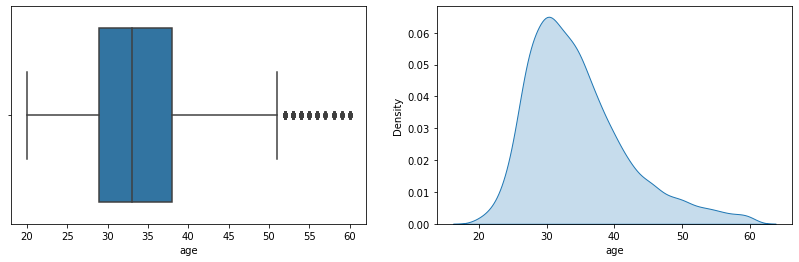

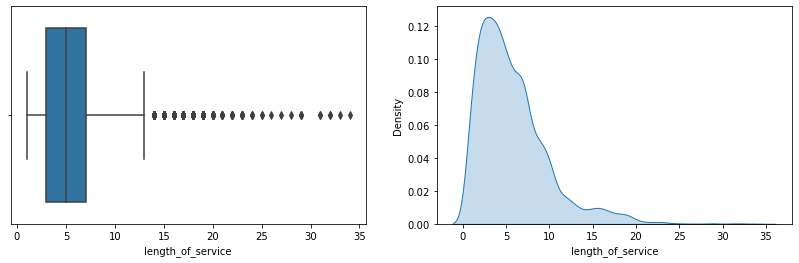

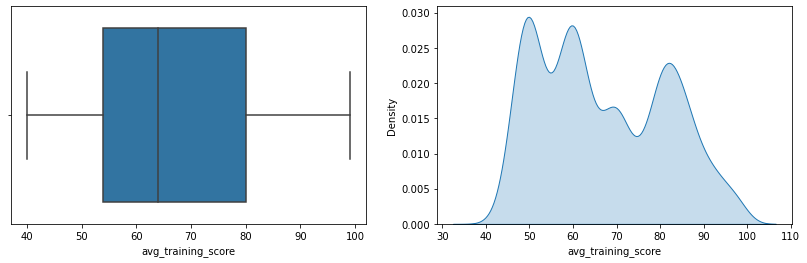

In [28]:
# Create list to store columns with continuous values
col = ['age', 'length_of_service', 'avg_training_score']

# Plot values
for c in col:
    boxplot_kdeplot(X_train, c)

### 1.2.5.2 After Transformation <a id = "1.2.5.2"></a>

[Back to top](#top)

In [29]:
# Create list to store column names
col = ['age', 'length_of_service']

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = col)

# fit transformer to the dataframe
yjt.fit(X_train)

# transform indicated variables
X_train_tf = yjt.transform(X_train)

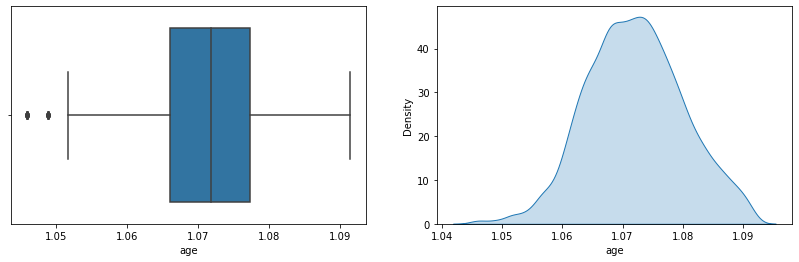

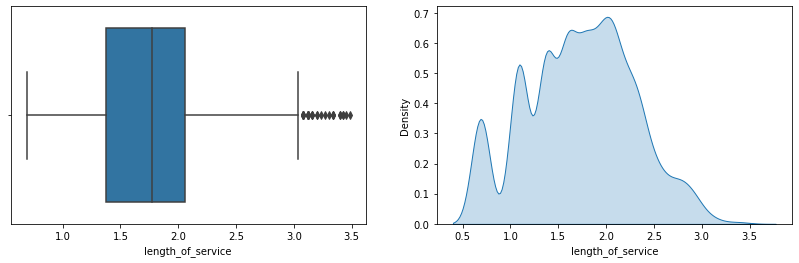

In [30]:
# Plot values
for c in col:
    boxplot_kdeplot(X_train_tf, c)

### 1.2.6 Standardise data <a id = "1.2.6"></a>

[Back to top](#top)

In [31]:
def PlotScale(data):
    # Set plot size
    fig, (ax1) = plt.subplots(figsize = (9, 6))
    
    # Plot values
    for column in data:
        sns.kdeplot(data[column], ax = ax1, label = column)
    
    # Show legend
    ax1.legend()
    
    plt.show()

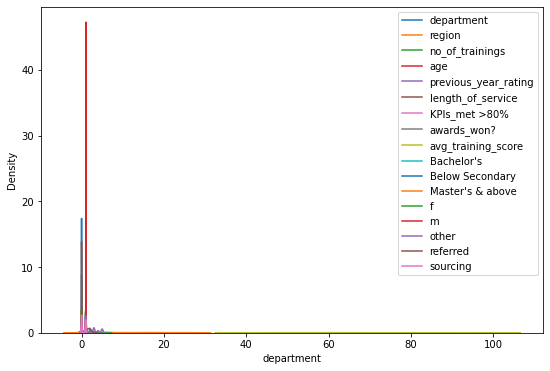

In [32]:
PlotScale(X_train_tf)

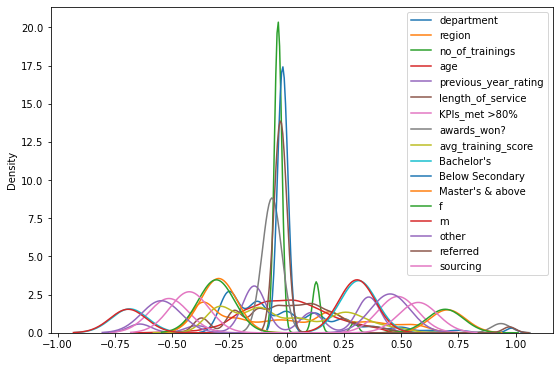

In [33]:
# Scale the data
X_train_scaled = (X_train_tf - X_train_tf.mean()) / (X_train_tf.max() - X_train_tf.min())
PlotScale(X_train_scaled)

## 1.3 Correlation Analysis <a id = "1.3"></a>

[Back to top](#top)

In [34]:
# Create a model using statsmodels.api: the Ordinary Least Squares (OLS) method and fit function
ols = sm.OLS(y_train, X_train_scaled).fit()

# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            is_promoted   R-squared (uncentered):                   0.148
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              81.22
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                   4.43e-215
Time:                        13:04:03   Log-Likelihood:                         -6460.1
No. Observations:                6535   AIC:                                  1.295e+04
Df Residuals:                    6521   BIC:                                  1.304e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.2802      0.036     -7.847      0.000      -0.350      -0.210
region                  -0.0719      0.027     -2.636      0.008      -0.125      -0.018
no_of_trainings         -0.1537      0.087     -1.774      0.076      -0.324       0.016
age                     -0.1360      0.067     -2.030      0.042      -0.267      -0.005
previous_year_rating     0.2741      0.029      9.574      0.000       0.218       0.330
length_of_service       -0.0013      0.054     -0.024      0.981      -0.106       0.104
KPIs_met >80%            0.3255      0.017     19.330      0.000       0.292       0.359
awards_won?              0.2381      0.034      7.084      0.000       0.172       0.304
avg_training_score       0.6289      0.036     17.317      0.000       0.558       0.700
Bachelor's               0.0075      0.022      0.331      0.741      -0.037       0.052
Below Secondary         -0.0500      0.044     -1.130      0.259      -0.137       0.037
Master's & above         0.0425      0.026      1.648      0.099      -0.008       0.093
f                       -0.0111      0.009     -1.258      0.208      -0.028       0.006
m                        0.0111      0.009      1.258      0.208      -0.006       0.028
other                    0.0097      0.018      0.527      0.598      -0.026       0.046
referred                -0.0131      0.033     -0.392      0.695      -0.078       0.052
sourcing                 0.0033      0.019      0.179      0.858      -0.033       0.040
==============================================================================
Omnibus:                     1439.844   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.512
Skew:                          -0.135   Prob(JB):                     3.69e-63
Kurtosis:                       2.008   Cond. No.                     1.11e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
# Remove columns with P>|t| values more than 0.05
# no_of_trainings, length_of_service, Bachelor's, Below Secondary, Master's & above, f, m, other, referred, sourcing
df1_final = df1_new.drop(['no_of_trainings', 'length_of_service', "Bachelor's", 'Below Secondary', "Master's & above", 
                          'f', 'm', "other", "referred", "sourcing"], axis = 1)

In [36]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(df1_final.drop(['is_promoted'], axis = 1), 
                                                    df1_final['is_promoted'], 
                                                    test_size = 0.3, 
                                                    random_state = 10)
X_train.shape, X_test.shape

((6535, 7), (2801, 7))

In [37]:
# Create list to store column names
col = ['age', 'avg_training_score']

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = col)

# fit transformer to the dataframe
yjt.fit(X_train)

# transform indicated variables
X_train_tf = yjt.transform(X_train)

In [38]:
# Scale the data
X_train_scaled = (X_train_tf - X_train_tf.mean()) / (X_train_tf.max() - X_train_tf.min())

In [39]:
# Create a model using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
ols = sm.OLS(y_train, X_train_scaled).fit()

# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            is_promoted   R-squared (uncentered):                   0.147
Model:                            OLS   Adj. R-squared (uncentered):              0.146
Method:                 Least Squares   F-statistic:                              160.2
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                   2.98e-219
Time:                        13:04:03   Log-Likelihood:                         -6467.4
No. Observations:                6535   AIC:                                  1.295e+04
Df Residuals:                    6528   BIC:                                  1.300e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.2857      0.036     -7.985      0.000      -0.356      -0.216
region                  -0.0627      0.027     -2.345      0.019      -0.115      -0.010
age                     -0.0834      0.047     -1.781      0.075      -0.175       0.008
previous_year_rating     0.2753      0.029      9.637      0.000       0.219       0.331
KPIs_met >80%            0.3263      0.017     19.395      0.000       0.293       0.359
awards_won?              0.2482      0.033      7.415      0.000       0.183       0.314
avg_training_score       0.6417      0.037     17.140      0.000       0.568       0.715
==============================================================================
Omnibus:                     1422.781   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.957
Skew:                          -0.157   Prob(JB):                     2.43e-64
Kurtosis:                       2.012   Cond. No.                         3.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.4 Export the data <a id = "1.4"></a>

[Back to top](#top)

In [40]:
hr_final_Xtrain = X_train_scaled
hr_final_Xtest = X_test
hr_final_ytrain = y_train
hr_final_ytest = y_test

hr_final_Xtrain.to_csv('hr_final_Xtrain.csv', index = False, sep = ',', encoding = 'utf-8')
hr_final_Xtest.to_csv('hr_final_Xtest.csv', index = False, sep = ',', encoding = 'utf-8')
hr_final_ytrain.to_csv('hr_final_ytrain.csv', index = False, sep = ',', encoding = 'utf-8')
hr_final_ytest.to_csv('hr_final_ytest.csv', index = False, sep = ',', encoding = 'utf-8')

# 2. Airbnb <a id = "2"></a>

[Back to top](#top)

## 2.1 Load and Explore the data <a id = "2.1"></a>

[Back to top](#top)

In [41]:
# Load dataset into a DataFrame
df_regressor = pd.read_csv("./data/listings.csv")

# Create a copy of the DataFrame
df2 = df_regressor.copy()

# Show overview of the dataset
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [43]:
df2.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## 2.2 Cleanse and Transform the data <a id = "2.2"></a>

[Back to top](#top)

In [44]:
# Drop columns as they are unneccessary for analysis
df2 = df2.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1)
df2.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355


### 2.2.1 Remove nulls <a id = "2.2.1"></a>

[Back to top](#top)

In [45]:
df2.select_dtypes(['int64', 'float64']).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [46]:
# Replace nulls in reviews_per_month with median
df2['reviews_per_month'] = df2['reviews_per_month'].fillna(df2['reviews_per_month'].median()).astype(float)

In [47]:
df2.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 2.2.2 Map categorical values into integers <a id = "2.2.2"></a>

[Back to top](#top)

### neighbourhood_group

In [48]:
# Check for rare values
df2['neighbourhood_group'].value_counts()

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

In [49]:
# Create encoder
neighbourhood_enc = ohe()

# Create variable to store fitted and transformed encoder
temp = neighbourhood_enc.fit_transform(df2[['neighbourhood_group']]).toarray()

# Get labels
labels = neighbourhood_enc.categories_[0]

# Create dataframe for 'neighbourhood_group'
features = pd.DataFrame(temp, columns = labels)

# Concatenate dataframe with df2
df2_enc = pd.concat([df2, features], axis = 1)

# Drop 'neighbourhood_group' column
df2_enc = df2_enc.drop('neighbourhood_group', axis = 1)

df2_enc.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region
0,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365,0.0,0.0,1.0,0.0,0.0
1,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365,1.0,0.0,0.0,0.0,0.0
2,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365,0.0,0.0,1.0,0.0,0.0
3,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353,0.0,1.0,0.0,0.0,0.0
4,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355,0.0,1.0,0.0,0.0,0.0


### neighbourhood

In [50]:
# Check for rare values
df2_enc['neighbourhood'].value_counts()

Kallang                    1043
Geylang                     994
Novena                      537
Rochor                      536
Outram                      477
Bukit Merah                 470
Downtown Core               428
Bedok                       373
River Valley                362
Queenstown                  266
Tanglin                     210
Singapore River             175
Marine Parade               171
Jurong West                 153
Orchard                     136
Newton                      134
Bukit Timah                 131
Jurong East                 118
Hougang                     109
Clementi                    102
Toa Payoh                   101
Pasir Ris                    71
Serangoon                    69
Sengkang                     67
Woodlands                    67
Bukit Batok                  65
Tampines                     64
Museum                       63
Choa Chu Kang                63
Ang Mo Kio                   58
Bishan                       57
Yishun  

In [51]:
# Replace values with <100 count
# Pasir Ris, Serangoon, Sengkang, Woodlands, Bukit Batok, Tampines, Museum, Choa Chu Kang, Ang Mo Kio, Bishan, 
# Yishun, Punggol, Sembawang, Bukit Panjang, Central Water Catchment, Southern Islands, Sungei Kadut,
# Western Water Catchment, Mandai, Tuas, Marina South, and Lim Chu Kang with rare
df2_enc['neighbourhood'] = df2_enc['neighbourhood'].replace(['Pasir Ris', 'Serangoon', 'Sengkang', 'Woodlands', 'Bukit Batok', 
                                                     'Tampines', 'Museum', 'Choa Chu Kang', 'Ang Mo Kio', 'Bishan', 
                                                     'Yishun', 'Punggol', 'Sembawang', 'Bukit Panjang', 
                                                     'Central Water Catchment', 'Southern Islands', 'Sungei Kadut', 
                                                     'Western Water Catchment', 'Mandai', 'Tuas', 'Marina South', 
                                                     'Lim Chu Kang'], 
                                                    'rare')
df2_enc['neighbourhood'].value_counts()

Kallang            1043
Geylang             994
rare                881
Novena              537
Rochor              536
Outram              477
Bukit Merah         470
Downtown Core       428
Bedok               373
River Valley        362
Queenstown          266
Tanglin             210
Singapore River     175
Marine Parade       171
Jurong West         153
Orchard             136
Newton              134
Bukit Timah         131
Jurong East         118
Hougang             109
Clementi            102
Toa Payoh           101
Name: neighbourhood, dtype: int64

In [52]:
# Map values to integers
df2_enc['neighbourhood'] = df2_enc['neighbourhood'].map({'Kallang': 0, 'Geylang': 1, 'Novena': 2, 'Rochor': 3, 
                                                         'Outram': 4, 'Bukit Merah': 5, 'Downtown Core': 6, 'Bedok': 7, 
                                                         'River Valley': 8, 'Queenstown': 9, 'Tanglin': 10, 
                                                         'Singapore River': 11, 'Marine Parade': 12, 'Jurong West': 13, 
                                                         'Orchard': 14, 'Newton': 15, 'Bukit Timah': 16, 'Jurong East': 17, 
                                                         'Hougang': 18, 'Clementi': 19, 'Toa Payoh': 20, 'rare': 21}
                                                       ).astype(int)
df2_enc['neighbourhood'].value_counts()

0     1043
1      994
21     881
2      537
3      536
4      477
5      470
6      428
7      373
8      362
9      266
10     210
11     175
12     171
13     153
14     136
15     134
16     131
17     118
18     109
19     102
20     101
Name: neighbourhood, dtype: int64

### room_type

In [53]:
# Check for rare values
df2_enc['room_type'].value_counts()

Entire home/apt    4132
Private room       3381
Shared room         394
Name: room_type, dtype: int64

In [54]:
# Create encoder
room_enc = ohe()

# Create variable to store fitted and transformed encoder
temp = room_enc.fit_transform(df2_enc[['room_type']]).toarray()

# Get labels
labels = room_enc.categories_[0]

# Create dataframe for 'room_type'
features = pd.DataFrame(temp, columns = labels)

# Concatenate dataframe with df2_enc
df2_enc = pd.concat([df2_enc, features], axis = 1)

# Drop 'room_type' column
df2_enc = df2_enc.drop('room_type', axis = 1)

df2_enc.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region,Entire home/apt,Private room,Shared room
0,21,1.44255,103.79580,83,180,1,0.01,2,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,16,1.33235,103.78521,81,90,18,0.28,1,365,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,1.44246,103.79667,69,6,20,0.20,2,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,21,1.34541,103.95712,206,1,14,0.15,9,353,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,21,1.34567,103.95963,94,1,22,0.22,9,355,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### 2.2.3 Train-test Split <a id = "2.2.3"></a>

[Back to top](#top)

In [55]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(df2_enc.drop(['price'], axis = 1), 
                                                    df2_enc['price'], 
                                                    test_size = 0.3, 
                                                    random_state = 10)
X_train.shape, X_test.shape

((5534, 16), (2373, 16))

### 2.2.4 Check for outliers <a id = "2.2.4"></a>

[Back to top](#top)

### 2.2.4.1 Before Transformation <a id = "2.2.4.1"></a>

[Back to top](#top)

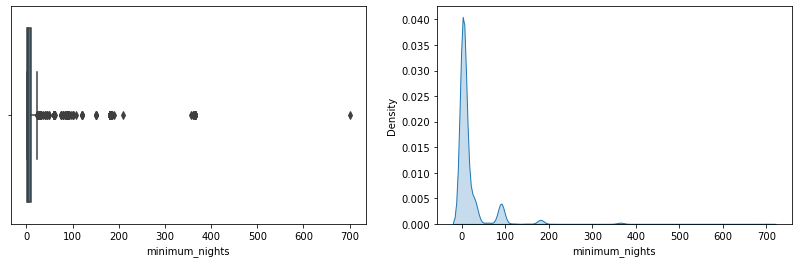

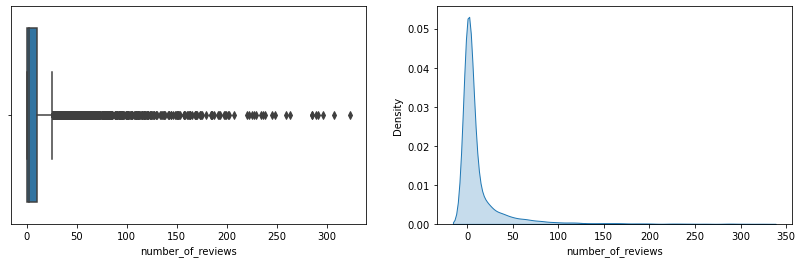

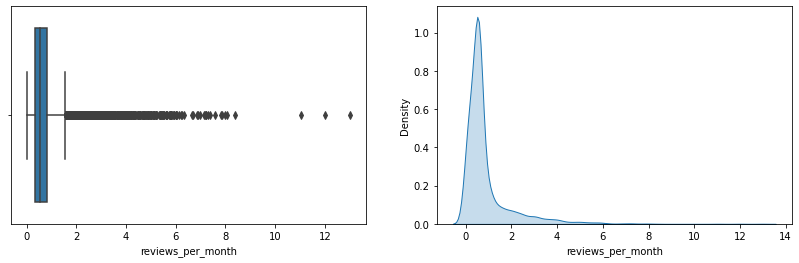

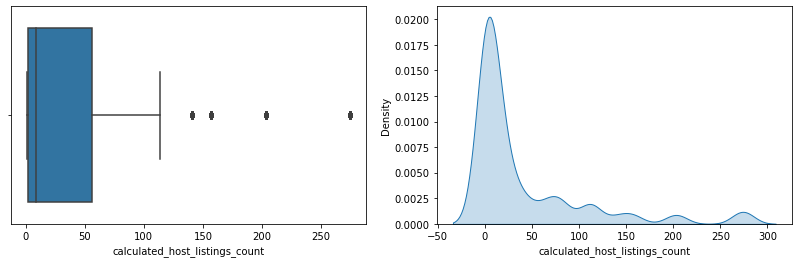

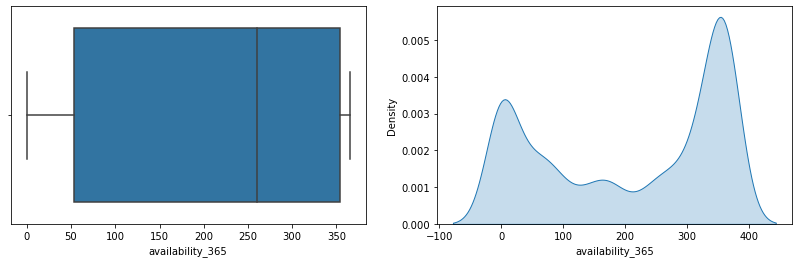

In [56]:
# Create a list to store columns with continuous values
col = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Plot values
for c in col:
    boxplot_kdeplot(X_train, c)

### 2.2.4.2 After Transformation <a id = "2.2.4.2"></a>

[Back to top](#top)

In [57]:
# Create list to store column names
col = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = col)

# fit transformer to the dataframe
yjt.fit(X_train)

# transform indicated variables
X_train_tf = yjt.transform(X_train)

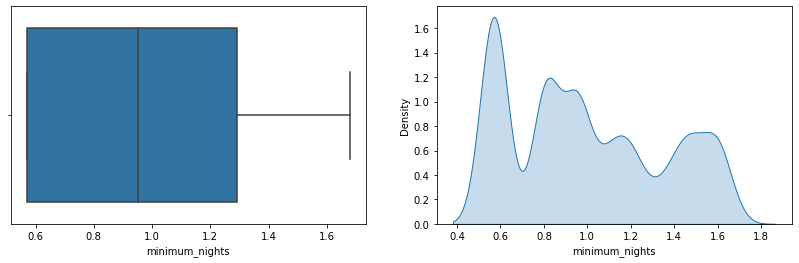

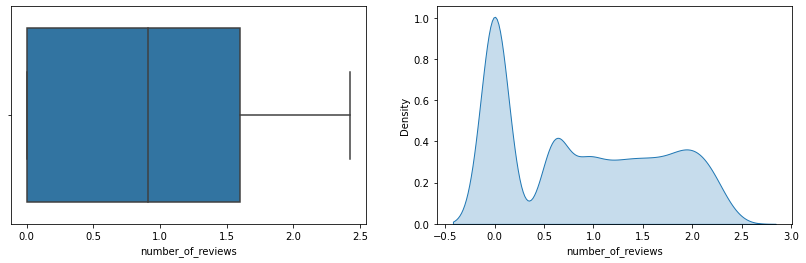

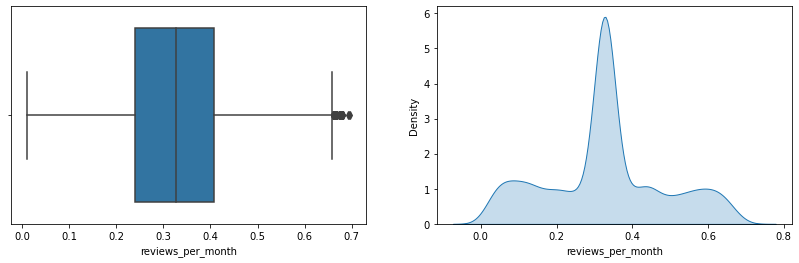

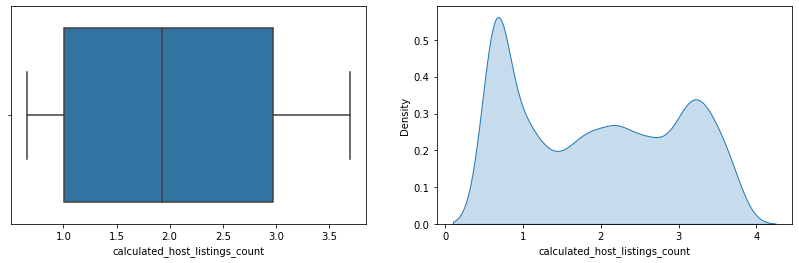

In [58]:
for c in col:
    boxplot_kdeplot(X_train_tf, c)

### 2.2.5 Standardise data <a id = "2.2.5"></a>

[Back to top](#top)

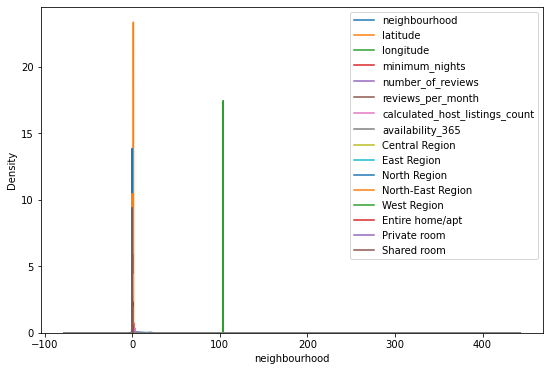

In [59]:
# Use the same plotting tool as part 1
PlotScale(X_train_tf)

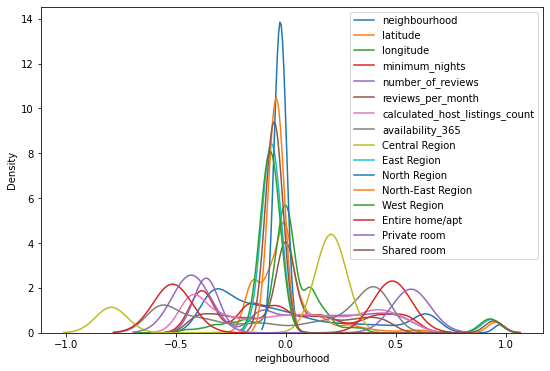

In [60]:
X_train_scaled = (X_train_tf - X_train_tf.mean()) / (X_train_tf.max() - X_train_tf.min())
PlotScale(X_train_scaled)

## 2.3 Correlation Analysis <a id = "2.3"></a>

[Back to top](#top)

In [61]:
# Create a model using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
ols = sm.OLS(y_train, X_train_scaled).fit()

# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.046
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              19.04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                    1.80e-47
Time:                        13:04:06   Log-Likelihood:                         -40502.
No. Observations:                5534   AIC:                                  8.103e+04
Df Residuals:                    5520   BIC:                                  8.113e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                     54.7142     22.208      2.464      0.014      11.177      98.251
latitude                        -230.4677     60.484     -3.810      0.000    -349.041    -111.894
longitude                        -72.2515     73.055     -0.989      0.323    -215.469      70.966
minimum_nights                   -91.7091     17.174     -5.340      0.000    -125.376     -58.042
number_of_reviews                -93.9382     16.619     -5.652      0.000    -126.519     -61.358
reviews_per_month                  3.1997     23.772      0.135      0.893     -43.402      49.802
calculated_host_listings_count   -86.8990     18.987     -4.577      0.000    -124.121     -49.676
availability_365                  60.1617     14.209      4.234      0.000      32.307      88.016
Central Region                    -1.9229     19.687     -0.098      0.922     -40.517      36.671
East Region                       19.6911     27.989      0.704      0.482     -35.178      74.560
North Region                      10.2392     33.137      0.309      0.757     -54.723      75.201
North-East Region                -16.1553     23.331     -0.692      0.489     -61.893      29.583
West Region                      -11.8520     27.497     -0.431      0.666     -65.758      42.054
Entire home/apt                  116.7478      9.593     12.171      0.000      97.943     135.553
Private room                     -20.2995      9.441     -2.150      0.032     -38.808      -1.791
Shared room                      -96.4483     15.247     -6.326      0.000    -126.338     -66.559
==============================================================================
Omnibus:                    12153.984   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58250399.892
Skew:                          20.037   Prob(JB):                         0.00
Kurtosis:                     504.015   Cond. No.                     1.52e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
# Remove columns with P>|t| values more than 0.05
# longitude, reviews_per_month, Central Region, East Region, North Region, North-East Region, West Region
df2_final = df2_enc.drop(['longitude', 'reviews_per_month', "Central Region", "East Region", 
                          "North Region", "North-East Region", 'West Region'], 
                         axis = 1)

In [63]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(df2_final.drop(['price'], axis = 1), 
                                                    df2_final['price'], 
                                                    test_size = 0.3, 
                                                    random_state = 10)
X_train.shape, X_test.shape

((5534, 9), (2373, 9))

In [64]:
# Create list to store column names
col = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = col)

# fit transformer to the dataframe
yjt.fit(X_train)

# transform indicated variables
X_train_tf = yjt.transform(X_train)

In [65]:
X_train_scaled = (X_train_tf - X_train_tf.mean()) / (X_train_tf.max() - X_train_tf.min())

In [66]:
# Create a model using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
ols = sm.OLS(y_train, X_train_scaled).fit()

# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.046
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              33.00
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                    3.42e-51
Time:                        13:04:06   Log-Likelihood:                         -40504.
No. Observations:                5534   AIC:                                  8.102e+04
Df Residuals:                    5526   BIC:                                  8.108e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                     63.1123     18.420      3.426      0.001      27.002      99.223
latitude                        -239.9167     41.028     -5.848      0.000    -320.348    -159.486
minimum_nights                   -91.3247     16.962     -5.384      0.000    -124.578     -58.072
number_of_reviews                -94.9477     15.550     -6.106      0.000    -125.431     -64.465
calculated_host_listings_count   -88.0255     18.825     -4.676      0.000    -124.931     -51.120
availability_365                  61.6225     14.151      4.355      0.000      33.881      89.364
Entire home/apt                  116.5176      9.500     12.264      0.000      97.893     135.142
Private room                     -20.1266      9.376     -2.147      0.032     -38.506      -1.747
Shared room                      -96.3910     15.181     -6.349      0.000    -126.152     -66.630
==============================================================================
Omnibus:                    12161.459   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58509105.113
Skew:                          20.065   Prob(JB):                         0.00
Kurtosis:                     505.129   Cond. No.                     3.70e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 2.4 Export the data <a id = "2.4"></a>

[Back to top](#top)

In [67]:
airbnb_final_Xtrain = X_train_scaled
airbnb_final_Xtest = X_test
airbnb_final_ytrain = y_train
airbnb_final_ytest = y_test

airbnb_final_Xtrain.to_csv('airbnb_final_Xtrain.csv', index = False, sep = ',', encoding = 'utf-8')
airbnb_final_Xtest.to_csv('airbnb_final_Xtest.csv', index = False, sep = ',', encoding = 'utf-8')
airbnb_final_ytrain.to_csv('airbnb_final_ytrain.csv', index = False, sep = ',', encoding = 'utf-8')
airbnb_final_ytest.to_csv('airbnb_final_ytest.csv', index = False, sep = ',', encoding = 'utf-8')

# 3 Unlisted YouTube Video <a id = "3"></a>

[Back to top](#top)

https://youtu.be/pLwhdRoc0TU